In [1]:
import sys

sys.path.insert(0,"../../src")
from numba import njit

import numpy as np
import hoomd
from hoomd import md
import helper
import potentials

In [2]:
hoomd.context.initialize("--mode=cpu")

HOOMD-blue 2.9.0 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 02/04/2020
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Lui, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU


In [3]:
phi = .9
N = 500
seed = 0
L = helper.phi_to_L_simplebi_2D(phi=phi,N=N)
snapshot = hoomd.data.make_snapshot(N=N, box=hoomd.data.boxdim(L=L,dimensions=2),
    particle_types=['A', 'B'])
np.random.seed(seed)
snapshot.particles.position[:,:2] = np.random.uniform(low=-L/2,high=L/2,size=(N,2))
snapshot.particles.velocity[:] = np.zeros_like(snapshot.particles.velocity[:])
snapshot.particles.typeid[:int(N/2)] = 0
snapshot.particles.typeid[int(N/2):] = 1
system = hoomd.init.read_snapshot(snapshot)
nlist = md.nlist.cell()
mypair = potentials.set_interaction_potential_hertzian(nlist)

notice(2): Group "all" created containing 500 particles


In [81]:
nve.disable()

In [82]:
nve = hoomd.md.integrate.nve(group=hoomd.group.all())

In [79]:

fire_coarse = hoomd.md.integrate.mode_minimize_fire(dt=0.1, alpha_start=0.1, ftol=1e-7, Etol=1e-7)

In [83]:
i = 0
while not(fire_coarse.has_converged()):
    hoomd.run(100,quiet=True)
    print(i)
    i += 1
initial_steps = 0

In [63]:
hoomd.data.system_data.particles.pdata

AttributeError: type object 'system_data' has no attribute 'particles'

In [7]:
snapshot2 = system.take_snapshot()

In [57]:
import copy

In [70]:
rotate(snapshot2.particles.position[:,:2], np.pi/3)

.83273602e+00,  8.27085209e+00],
       [-6.95018911e+00, -7.89216661e+00],
       [ 1.11553249e+01, -7.80110359e-02],
       [ 5.79860401e+00, -9.29774857e+00],
       [ 5.07186031e+00, -7.87474728e+00],
       [-6.28936768e-01, -4.30170155e+00],
       [-7.27676153e+00, -5.42720890e+00],
       [ 5.78985500e+00, -7.67695904e-01],
       [ 7.69386339e+00, -3.64069939e+00],
       [-6.71104765e+00,  6.16918850e+00],
       [-5.48969793e+00, -1.77594614e+00],
       [-7.42877483e+00, -3.80858064e+00],
       [ 3.03623915e+00, -6.22046614e+00],
       [ 9.74690819e+00, -4.08265591e+00],
       [-5.70537090e+00,  1.11545391e+01],
       [ 6.40873623e+00,  1.42843962e+00],
       [-5.97224140e+00,  9.28238010e+00],
       [-4.99019957e+00, -4.68857193e+00],
       [-1.20054662e+00,  2.35645247e+00],
       [-1.15853863e+01, -1.00770712e+00],
       [-5.51547527e+00,  1.47050154e+00],
       [ 5.59240341e+00,  1.52232099e+00],
       [ 5.88442802e+00,  4.31198740e+00],
       [ 2.71794605e+

In [68]:
@njit
def rotate(pos, alpha):
    mat = np.array([[np.cos(alpha),-np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]], np.float32)
    new_pos = np.zeros_like(pos)
    for i in np.arange(len(pos)):
        p = pos[i]
        new_p = np.dot(mat, p)
        new_pos[i] = new_p
    return new_pos

array([[ 7.07106781e-01,  7.07106781e-01],
       [-7.07106781e-01,  7.07106781e-01],
       [ 1.11022302e-16,  1.00000000e+00]])

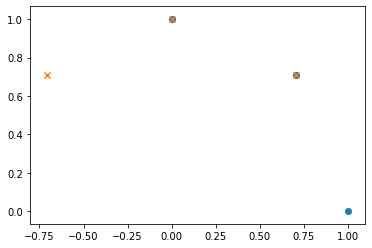

In [56]:
x = np.array([[1,0],[0,1],[1/np.sqrt(2),1/np.sqrt(2)]], dtype=np.float64)
nx = rotate(x, np.pi/4)
plt.scatter(x[:,0], x[:,1])
plt.scatter(nx[:,0], nx[:,1], marker='x')
nx

In [8]:
snapshot2.has_pair_data

False

In [9]:
np.where(snapshot2.particles.typeid == 0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

(-10, 10)

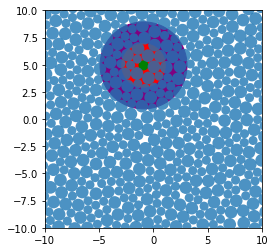

In [12]:
patches = []
rad = {0:5/12,1:7/12}
i = 0
for p, t in zip(snapshot2.particles.position, snapshot2.particles.typeid):
    
    if i == 0:
        patches.append(mpl.patches.Circle(p, radius=4, color="purple"))
        patches.append(mpl.patches.Circle(p, radius=2, color="red"))
        patches.append(mpl.patches.Circle(p, radius=rad[t], alpha=1, color="green"))
    else:
        patches.append(mpl.patches.Circle(p, radius=rad[t], alpha=.8))
    i += 1
    
col = mpl.collections.PatchCollection(patches, match_original=True)
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")
ax.add_collection(col)
#pos = snapshot2.particles.position
#patch = mpl.patches.Circle(pos[0], radius=4, color="red")
#ax.add_patch(patch)
plt.xlim(-10,10)
plt.ylim(-10,10)

In [15]:
int(np.ceil(box))

22

In [14]:
# group into boxes
pos = snapshot2.particles.position
# make cell boundaries
box = snapshot2.box.Lx
be = np.linspace(-box/2, box/2, int(np.ceil(box)))


In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [86]:
snapshot.particles.N

500

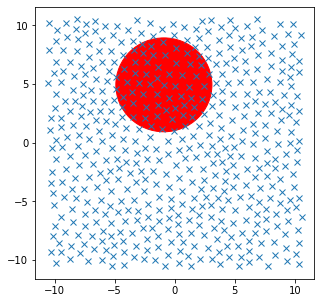

In [113]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(pos[:,0],pos[:,1],"x")
patch = mpl.patches.Circle(pos[0], radius=4, color="red")
ax.add_patch(patch)

In [84]:
diff = np.diff(be[:2])
diff

array([1.00841432])

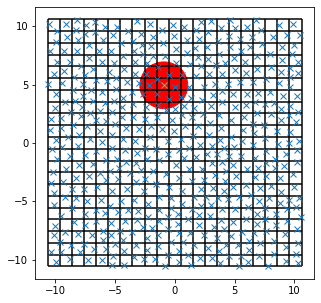

In [111]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(pos[:,0],pos[:,1],"x")
plt.plot(pos[0,0],pos[0,1],"x")
patch = plt.Circle(pos[0,:2], 5)

patch = mpl.patches.Circle(pos[0], radius=2, color="red")
ax.add_patch(patch)
for b in be:
    plt.hlines(b, be[0], be[-1])
    plt.vlines(b, be[0], be[-1])


In [76]:
np.

10.588350379383003

In [36]:

np.digitize(pos[0,:2], be)

array([10, 16])

In [80]:
for i, p in enumerate(pos[:,:2]):
    tmp = np.digitize(p, be)
    #print(tmp)
    try:
        A[tmp[0]-1, tmp[1]-1].append(i)
    except:
        print(p, tmp)

In [25]:
ones = np.ones((22,22))

In [77]:
A = np.empty((21,21),dtype=object)

In [81]:
#count = 0
for i,v in enumerate(A):
    for j,u in enumerate(v):
        if len(u) == 0:
            print(i,j)

0 4
1 3
1 6
2 0
2 9
3 6
4 8
4 16
6 19
7 2
8 6
9 6
9 8
9 12
9 14
9 19
10 10
11 1
13 2
16 4
16 7
17 1
17 15
17 19
18 10
18 17
18 20
19 11


In [61]:
count = 0
for i,v in enumerate(A):
    for j,u in enumerate(v):
        #if len(u) == 0:
        #    print(i,j)
        for p in u:
            count += 1
print(count)

500


In [78]:
for i,v in enumerate(A):
    for j,u in enumerate(v):
        A[i,j] = []

In [79]:
A

array([[list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([])],
       [list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([])],
       [list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([])],
       [list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([]), list([]), list([]), list([]),
        list([]), list([]), list([])],
       [list([]), list([]), 

In [28]:
tmp = np.digitize(pos[0,:2], be)
ones[tmp[0], tmp[1]]

1.0

In [88]:
be*2

array([-21.17670076, -19.15987212, -17.14304347, -15.12621483,
       -13.10938618, -11.09255754,  -9.0757289 ,  -7.05890025,
        -5.04207161,  -3.02524297,  -1.00841432,   1.00841432,
         3.02524297,   5.04207161,   7.05890025,   9.0757289 ,
        11.09255754,  13.10938618,  15.12621483,  17.14304347,
        19.15987212,  21.17670076])

In [24]:
box

21.176700758766007

In [130]:
np.mean(pos, axis=0)

array([ 0.01881466, -0.02213791,  0.        ], dtype=float32)